## Lab | Random Forests

For this lab, you will be using the CSV files provided in the files_for_lab folder.

Instructions:

**Apply the Random Forest algorithm to predict the TARGET_B.** 
- Please note that this column suffers from **class imbalance**. 
- Fix the class imbalance using **upsampling**.

**Discuss the model predictions and it's impact in the bussiness scenario.** 
- Is the cost of a **false positive equals to the cost of the false negative**? 
- How much the money the company will not earn because of missclassifications made by the model?

**Sklearn classification models are trained to maximize the accuracy.** 
- However, another error metric will be more relevant here. Which one? 
- Please checkout make_scorer alongside with GridSearchCV in order to **train the model 
to maximize the error metric** of interest in this case.

* TARGET_B Target Variable: Binary Indicator for Response to 97NK Mailing
* TARGET_D Target Variable: Donation Amount (in \$) associated with the Response to 97NK Mailing

In [1]:
# Load libraries

import pandas as pd
import numpy as np

In [2]:
# Reading data
categorical = pd.read_csv('../../Afternoon/lab-random-forests/files_for_lab/categorical.csv')
numerical = pd.read_csv('../../Afternoon/lab-random-forests/files_for_lab/numerical.csv')
targets = pd.read_csv('../../Afternoon/lab-random-forests/files_for_lab/target.csv')

In [ ]:
#categorical

In [13]:
# Do I need columns from numerical? #AVGGIFT?
numerical

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0,60.000000,5,9,0,0,39,34,18,10,...,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39
1,1,46.000000,6,9,16,0,15,55,11,6,...,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1
2,1,61.611649,3,1,2,0,20,29,33,6,...,14,2.0,16.0,5.0,12,7.481481,15078,1,4,60
3,0,70.000000,1,4,2,0,23,14,31,3,...,7,2.0,11.0,10.0,9,6.812500,172556,1,4,41
4,0,78.000000,3,2,60,1,28,9,53,26,...,8,3.0,15.0,15.0,14,6.864865,7112,1,2,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,1,61.611649,5,9,0,14,36,47,11,7,...,0,25.0,25.0,25.0,9,25.000000,184568,0,1,12
95408,1,48.000000,7,9,1,0,31,43,19,4,...,0,20.0,20.0,20.0,9,20.000000,122706,1,1,2
95409,1,60.000000,5,9,0,0,18,46,20,7,...,4,3.0,10.0,10.0,3,8.285714,189641,1,3,34
95410,0,58.000000,7,9,0,0,28,35,20,9,...,18,5.0,21.0,18.0,4,12.146341,4693,1,4,11


In [3]:
targets

,TARGET_B,TARGET_D
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
...,...,...
95407,0,0.0
95408,0,0.0
95409,0,0.0
95410,1,18.0


In [ ]:
# Detect class imbalance

In [4]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Is dropping other column Target_D necessary?

In [5]:
columns_to_drop = ['TARGET_D']
targets = targets.drop(columns=columns_to_drop)
targets.shape

(95412, 1)

In [6]:
targets

,TARGET_B
0,0
1,0
2,0
3,0
4,0
...,...
95407,0
95408,0
95409,0
95410,1


In [ ]:
# How to get column for Random Forest
# Define feature columns (X) and the target column (y)
X = df.drop('TARGET_B', axis=1)  # Features (all columns except the target column)
y = df['TARGET_B']  # Target column you want to predict

num_columns = df.shape[1] 
print(f"Number of columns after dropping: {num_columns}")


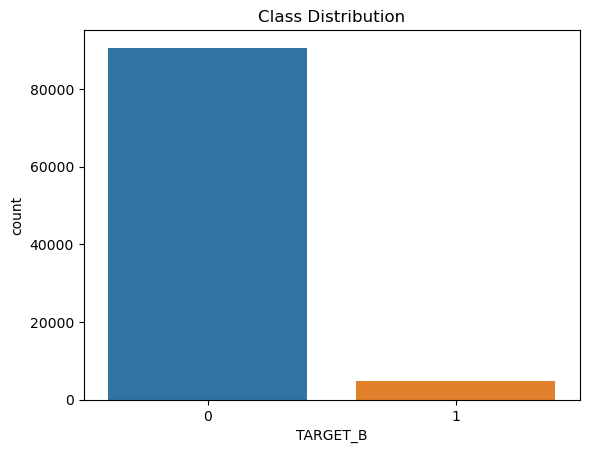

In [7]:
# Check 'TARGET_B' for class imbalance

df = pd.DataFrame(targets)

sns.countplot(data=df, x='TARGET_B')
plt.title('Class Distribution')
plt.show()

In [ ]:
#Identify the Imbalanced Dataset
The dataset is imbalanced: the distribution of classes is significantly skewed.

In [16]:
# Import Necessary Libraries:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification


In [19]:
X, y = make_classification(n_samples=1000, n_features=20, weights=[0.9, 0.1], random_state=42)

y_series = pd.Series(y)
class_distribution = y_series.value_counts()

class_percentage = class_distribution / len(y_series) * 100


In [ ]:
#Apply upsampling:

In [9]:
# Separate the Classes:
# Assuming 'df' is your DataFrame with a target column 'TARGET_B'
majority_class = df[df['TARGET_B'] == 'majority_class']
minority_class = df[df['TARGET_B'] == 'minority_class']
print(majority_class)
print(minority_class)

Empty DataFrame
Columns: [TARGET_B]
Index: []
Empty DataFrame
Columns: [TARGET_B]
Index: []


In [10]:
# Upsample the Minority Class:
# Calculate the number of samples needed
num_samples_needed = len(majority_class) - len(minority_class)
num_samples_needed

0

In [11]:
# Upsample the minority class
upsampled_minority = resample(minority_class, replace=True, n_samples=num_samples_needed, random_state=42)

InvalidParameterError: The 'n_samples' parameter of resample must be an int in the range [1, inf) or None. Got 0 instead.

In [12]:
#Concatenate the upsampled minority class with the majority class to create a balanced dataset:
balanced_df = pd.concat([majority_class, upsampled_minority])

NameError: name 'upsampled_minority' is not defined

In [21]:
# Save balanced_df
balanced_df.to_csv('balanced_df.csv', index=False)
# Use balanced dataset for training machine learning model:
#balanced_df

,TARGET_B
0,0
1,0
2,0
3,0
4,0
...,...
95407,0
95408,0
95409,0
95410,1


In [ ]:
# Apply the Random Forest algorithm to predict the TARGET_B:

In [ ]:
# Import Libraries
from sklearn.ensemble import RandomForestRegressor  # For regression

In [ ]:
# Load and Preprocess Data:

# Load your dataset into a DataFrame (replace 'your_data.csv' with your dataset)
targets = pd.read_csv('../../Afternoon/lab-random-forests/files_for_lab/target.csv')

# Define features (X) and the target (y)
X = df.drop('TARGET_B', axis=1)  # Features (all columns except the target column)
y = df['TARGET_B']  # Target column you want to predict

In [ ]:
# Split Data into Training and Testing Sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Create and Train the Random Forest Model
# Create a Random Forest model

model = RandomForestRegressor()  # For regression

# Train the model on the training data
model.fit(X_train, y_train)


In [ ]:
# Make Predictions
y_pred = model.predict(X_test)  # Make predictions on the test data
y_pred

In [ ]:
# Evaluate Model Performance # Classification
#from sklearn.metrics import accuracy_score, classification_report

#accuracy = accuracy_score(y_test, y_pred)
#report = classification_report(y_test, y_pred)

#print(f"Accuracy: {accuracy}")
#print("Classification Report:\n", report)


For **regression** tasks, metrics like Mean Absolute Error (MAE) 
and Mean Squared Error (MSE) are commonly used.

In [ ]:
# Define y_true for a regression problem:
# Assuming 'TARGET_B' is the column you want to predict

y_true = df['TARGET_B']

After you've defined **y_true**, you can use it to evaluate your model's performance by comparing its predictions to these true values. 

In practice, **y_true** is the **ground truth** data that you should have during the model evaluation phase to assess how well your model is performing.

It allows you to determine the model's accuracy in predicting the target variable.

In [22]:
# Evaluate Model Performance # Regression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

mean_absolute_error = mean_absolute_error(y_true, y_pred)
mean_squared_error = mean_squared_error(y_true, y_pred)

print(f"Mean Absolute Error: {mean_absolute_error}")

NameError: name 'y_true' is not defined

In [ ]:
# Discuss the model predictions and it's impact in the bussiness scenario:
# Is the cost of a false positive equals to the cost of the false negative? Confusion Matrix?
# How much the money the company will not earn because of missclassifications made by the model?

In [ ]:
# Choose relevant error metric:

In [ ]:
# Train the model to maximize the error metric:

__________________________________

## Questions

* What kind of datacleaning needs to be done? Did I do enough?
* How to Separate the Classes for upsampeling:
* What kind of upsampling needs to be done?
* How kan I apply upsampling correctly?